In [2]:
!pip install -r requirements.txt

In [3]:
# Import data
import pandas as pd

df_cab_data = pd.read_csv('DataSets-main/Cab_Data.csv')
df_city = pd.read_csv('DataSets-main/City.csv')
df_cust_data = pd.read_csv('DataSets-main/Customer_ID.csv')
df_trans_data = pd.read_csv('DataSets-main/Transaction_ID.csv')

In [20]:
# Merge data based on shared columns into final dataset
df_trans_cust_left_merge = df_trans_data.merge(df_cust_data, how='left')
df_cab_trans_cust = df_cab_data.merge(df_trans_cust_left_merge, how='left')
df_final = df_cab_trans_cust.merge(df_city, how='left')
df_final['Population'] = df_final['Population'].str.replace(',', '').str.strip().astype(int)
df_final['Users'] = df_final['Users'].str.replace(',', '').str.strip().astype(int)

# Split final dataset by company
yellow_cab_data = df_final[df_final['Company'] == 'Yellow Cab']
pink_cab_data = df_final[df_final['Company'] == 'Pink Cab']

yellow_cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
233,10000384,42371,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,27602,Card,Male,23,8542,814885,24701
234,10000385,42378,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,27594,Cash,Male,28,3901,814885,24701
235,10000386,42372,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,27884,Cash,Male,32,13505,814885,24701
236,10000387,42375,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,28533,Cash,Male,39,28386,814885,24701
237,10000388,42376,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,29039,Card,Male,35,17761,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,418859,127001
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,418859,127001
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,418859,127001
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,418859,127001


In [5]:
# First, we see that yellow cab has more customers than pink cab
yc_customer_count = yellow_cab_data['Customer ID'].nunique()
pc_customer_count = pink_cab_data['Customer ID'].nunique()

print("Yellow customer count: ", yc_customer_count)
print("Pink customer count: ", pc_customer_count)

# We know that the data is collected over the course of 35 months, so we can find monthly spending
yc_spending = yellow_cab_data.groupby('Customer ID')['Price Charged'].sum().reset_index()
yc_spending.columns = ['Customer ID', 'Money Spent per Month']
yc_spending['Money Spent per Month'] = yc_spending['Money Spent per Month'] / 35

pc_spending = pink_cab_data.groupby('Customer ID')['Price Charged'].sum().reset_index()
pc_spending.columns = ['Customer ID', 'Money Spent per Month']
pc_spending['Money Spent per Month'] = pc_spending['Money Spent per Month'] / 35

yc_average_monthly_spending = yc_spending['Money Spent per Month'].mean()
pc_average_monthly_spending = pc_spending['Money Spent per Month'].mean()

print("Average monthly spending for yellow cab: ", yc_average_monthly_spending)
print("Average monthly spending for pink cab: ", pc_average_monthly_spending)

# Conclusion of code: yellow cab has more customers than the pink cab and
#the mean monthly spending for yellow cab customers is greater than mean monthly spending for pink cab customers


Yellow customer count:  39896
Pink customer count:  32330
Average monthly spending for yellow cab:  90.12997163338967
Average monthly spending for pink cab:  23.26742196986434


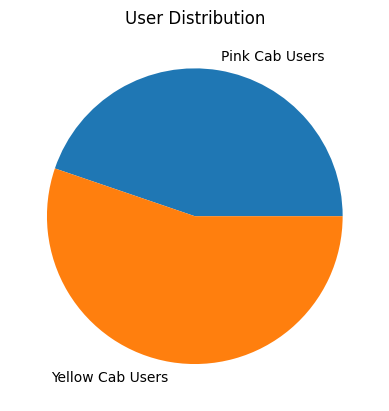

In [1]:
import matplotlib.pyplot as plt
labels = ['Pink Cab Users', 'Yellow Cab Users']
sizes = [32330, 39896]
plt.pie(sizes, labels=labels)
plt.title('User Distribution')
plt.show()

In [9]:
# Lets take into account monthly income 
yc_income = yellow_cab_data[['Customer ID', 'Income (USD/Month)']].drop_duplicates()
yc_spending_and_income = pd.merge(yc_spending, yc_income, on='Customer ID')
yc_spending_and_income['Money Spent per $ of Income'] = yc_spending_and_income['Money Spent per Month'] / yc_spending_and_income['Income (USD/Month)']
print("Yellow cab spending per dollar of income: ", yc_spending_and_income['Money Spent per $ of Income'].mean())

pc_income = yellow_cab_data[['Customer ID', 'Income (USD/Month)']].drop_duplicates()
pc_spending_and_income = pd.merge(pc_spending, pc_income, on='Customer ID')
pc_spending_and_income['Money Spent per $ of Income'] = pc_spending_and_income['Money Spent per Month'] / pc_spending_and_income['Income (USD/Month)']
print("Pink cab spending per dollar of income: ", pc_spending_and_income['Money Spent per $ of Income'].mean())

print("Yellow cab average spedning per month: ", yc_spending_and_income['Money Spent per Month'].mean())
print("Pink cab average spedning per month: ", pc_spending_and_income['Money Spent per Month'].mean())	

print("Yellow cab average income per month: ", yc_spending_and_income['Income (USD/Month)'].mean())
print("Pink cab average income per month: ", pc_spending_and_income['Income (USD/Month)'].mean())

# Conclusion of code: Yellow cab customers spend more than 4x the amount pink cab customers do per dollar of income

Yellow cab spending per dollar of income:  0.009223904424841842
Pink cab spending per dollar of income:  0.0026757398060508813
Yellow cab average spedning per month:  90.12997163338967
Pink cab average spedning per month:  26.08105903169612
Yellow cab average income per month:  14983.896831762582
Pink cab average income per month:  15021.416788097247


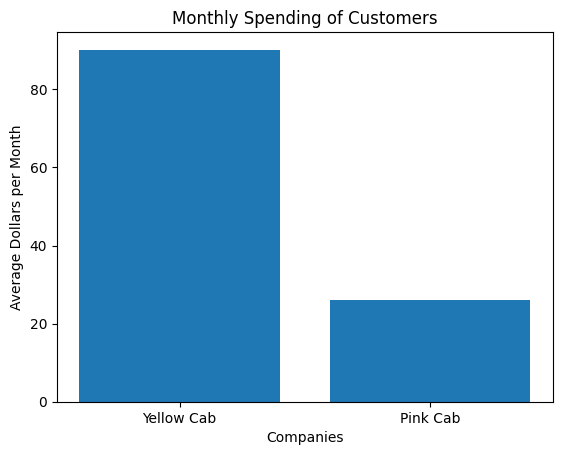

In [10]:
categories = ['Yellow Cab', 'Pink Cab']
values = [90.12997, 26.08105]

plt.bar(categories, values)

plt.title('Monthly Spending of Customers')
plt.xlabel('Companies')
plt.ylabel('Average Dollars per Month')

plt.show()

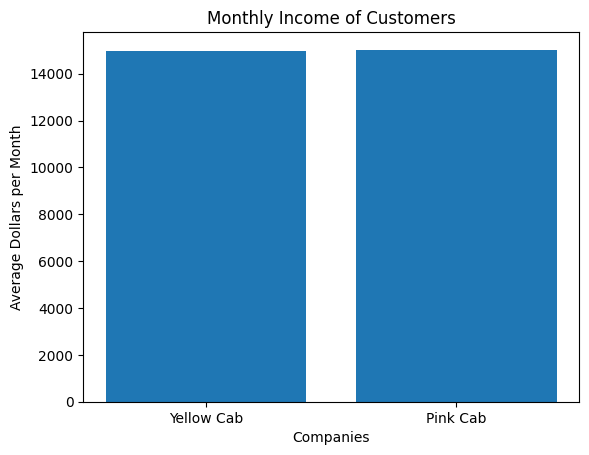

In [11]:
categories = ['Yellow Cab', 'Pink Cab']
values = [14983.896831762582,  15021.416788097247]

plt.bar(categories, values)

plt.title('Monthly Income of Customers')
plt.xlabel('Companies')
plt.ylabel('Average Dollars per Month')

plt.show()

In [7]:
# Lets check the growth of revenue over 35 months
yc_finances = yellow_cab_data.groupby('Date of Travel').agg(
    Price_Charged=('Price Charged', 'sum'), Cost_of_Trip=('Cost of Trip', 'sum')).reset_index()
yc_finances['Revenue'] = yc_finances['Price_Charged'] - yc_finances['Cost_of_Trip']

pc_finances = pink_cab_data.groupby('Date of Travel').agg(
    Price_Charged=('Price Charged', 'sum'), Cost_of_Trip=('Cost of Trip', 'sum')).reset_index()
pc_finances['Revenue'] = pc_finances['Price_Charged'] - pc_finances['Cost_of_Trip']

Text(0, 0.5, 'Revenue')

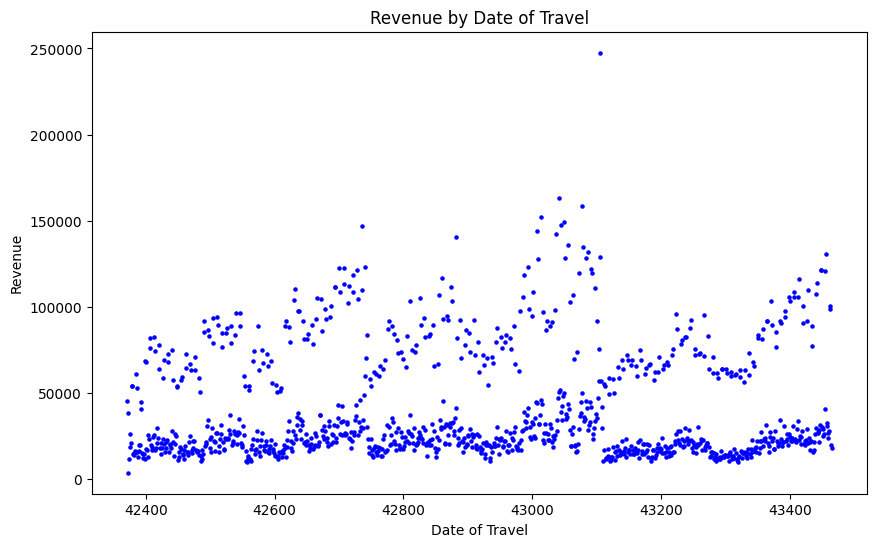

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(yc_finances['Date of Travel'], yc_finances['Revenue'], color='blue', marker='o', s=5)
plt.title('Revenue by Date of Travel')
plt.xlabel('Date of Travel')
plt.ylabel('Revenue')

Yellow cab average revenue:  40201.254037260274
Pink cab average revenue:  4846.875178995434


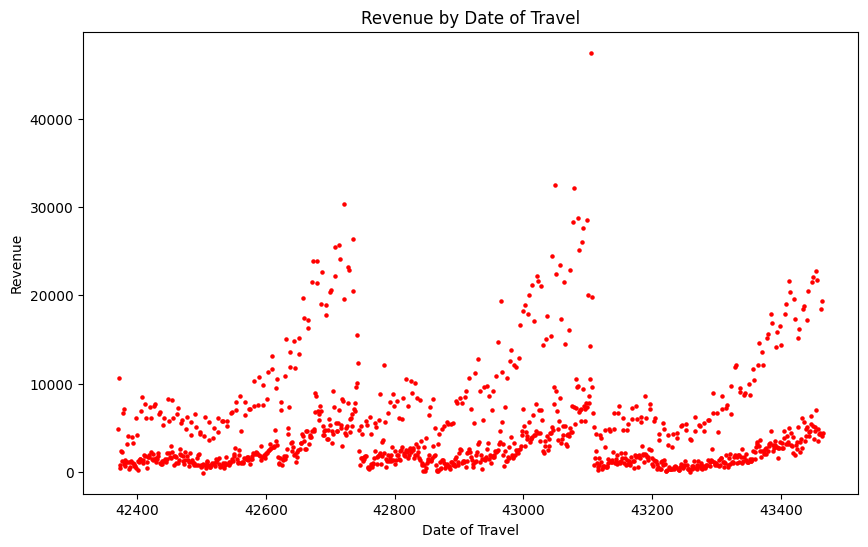

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(pc_finances['Date of Travel'], pc_finances['Revenue'], color='red', marker='o', s=5)
plt.title('Revenue by Date of Travel')
plt.xlabel('Date of Travel')
plt.ylabel('Revenue')

yc_avg_revenue = yc_finances['Revenue'].mean()
print("Yellow cab average revenue per day: ", yc_avg_revenue)

pc_avg_revenue = pc_finances['Revenue'].mean()
print("Pink cab average revenue per day: ", pc_avg_revenue)
# Conclusion of graphs: neither company shows strong growth in revenue, but yellow cabs daily revenue is significantly shifted higher than pink cab
# Although yellow cab is not showing growth, it is showing stability (no significant decreases in revenue over 35 month, indicates reliability)

In [41]:
# Now lets look at users per unit of population (to eliminate bias from more densely populated areas)
print("Yellow customer count: ", yc_customer_count)
print("Pink customer count: ", pc_customer_count)

yc_population_data = yellow_cab_data[['City', 'Population', 'Users']].drop_duplicates()
yc_population_data['Users per 100 people'] = yc_customer_count / yc_population_data['Population'] * 100

pc_population_data = pink_cab_data[['City', 'Population', 'Users']].drop_duplicates()
pc_population_data['Users per 100 people'] = pc_customer_count / pc_population_data['Population'] * 100

yc_unit_users = yc_population_data['Users per 100 people'].mean()
pc_unit_users = pc_population_data['Users per 100 people'].mean()

print("Yellow cab unit users: ", yc_unit_users)
print("Pink cab unit users: ", pc_unit_users)

Yellow customer count:  39896
Pink customer count:  32330
Yellow cab unit users:  5.707580102611533
Pink cab unit users:  4.625177078339454


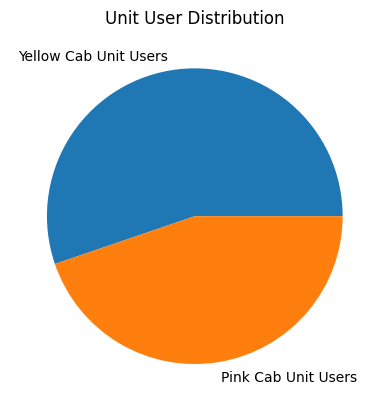

In [40]:
labels = ['Yellow Cab Unit Users', 'Pink Cab Unit Users']
sizes = [5.707580102611533, 4.625177078339454]
plt.pie(sizes, labels=labels)
plt.title('Unit User Distribution')
plt.show()